# 1. Project information

**Project title**: DrugBank: An Exploratory Analysis.

**Name:** Mohammed ALI

**Email address associated with your DataCamp account:** You can find this email [here](https://www.datacamp.com/profile/account_settings) if you have a DataCamp account.

**Project description**: Widely used in drug discovery, DrugBank is a publicly available resource that stores high-quality information on drugs and their targets. Since its incpetion in 2005, DrugBank has been frequently used by pharmaceutical companies, medicinal chemists, students and the general public. In this project, we will be performing a temporal analysis of DrugBank. That is, we will observe how the DrugBank database has evolved over time as this will implicitly give us a bird's eye view on the progress of the field of drug discovery as a whole as well as any trends that may have emerged. We will be exploring the dataset of this project via data visualization packages such as *ggplot* and *plotly*.

**Dataset(s) used**: The dataset is a subset of the full information stored in the DrugBank database. The dataset consists of information on thousands of drugs including their commercial names, indications (i.e. diseases/symptoms they are intended to treat), targets, drug manufacturers and so on.

**Assumed student knowledge**: Familiariaty with the *tidyverse* set of packages would be helpful but not strictly necessary. Specifically, we will be using the *dplyr* and *ggplot* packages as well as the pipe operator, %>%. We also make use of the *plotly* and *shiny* packages to produce some interactive visualizations.

# 2. Project introduction

## 1. *Drugs* ... Past and Present (Part 1)

DrugBank is a publicly free database that is widely used in the field of drug discovery. DrugBank stores extensive information on drugs and their targets. Established in 2005, DrugBank has since been adding so-called "drug cards" which are essentially drug records that contain supplementary information on the drugs (e.g. chemical structure, commercial names, ADMET properties, etc.) as well as their known targets (usually proteins). These drug cards are regularly curated by experts who ensure that the data inserted into DrugBank is accurate and up-to-date. These data are useful for pharmaceutical scientists and biochemists who are involved drug development. DrugBank may be accessed at: https://www.drugbank.ca/

The dataset we are using here is a subset of the full DrugBank database that has the information we need for our analysis. Specifically, the analysis we'll be doing here is a temporal analysis of some the aspects of the DrugBank database. We'll observe how the DrugBank database has evolved over time in terms of the numbers of drugs, targets and indications stored.

***Add logo of drugbank (or a royalty-free drug-related image) to the right hand side of this context cell. Make sure that the image you use has a [permissive license](https://support.google.com/websearch/answer/29508?hl=en) and display them using [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images).***

For starters, let's have a look at the drug types in the DrugBank database and how their numbers have increased over time. We'll display the following statistics over time since the inception of DrugBank:
- The number of small-molecule drugs
- The number of biotech drugs
- The number of drugs

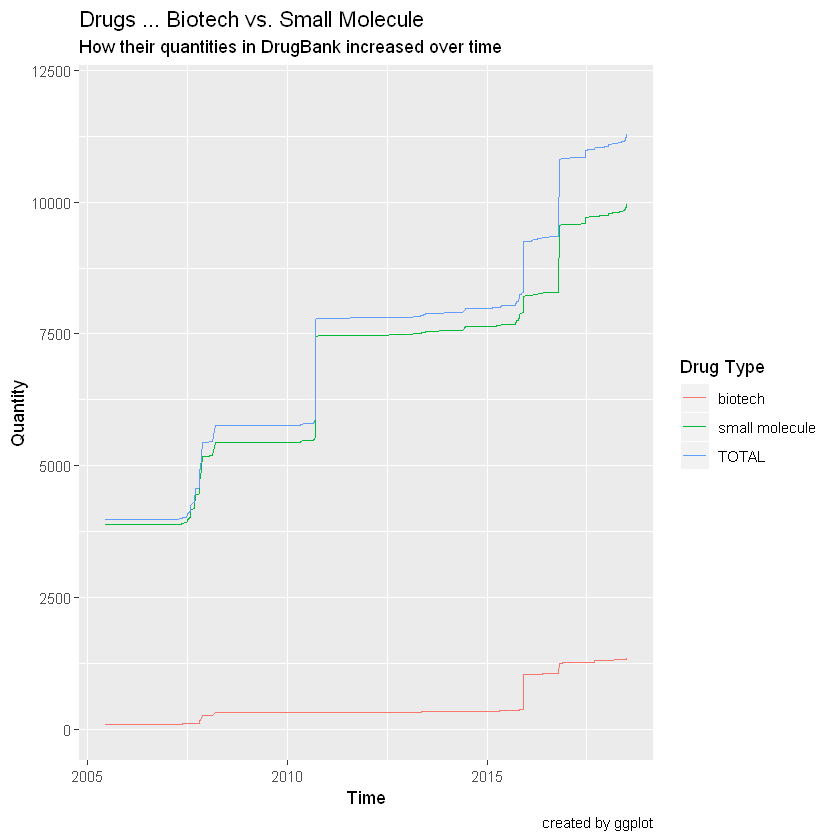

In [1]:
suppressMessages({
    ## load necessary packages
    require(tidyverse)
    require(lubridate)

    ## load data
    drugbank  <- read_csv("drugbank.csv")    ## main data
    drugbank_target_actions  <- read_csv("target_actions.csv")    ## accompanying targets data
})


## TO DO:
## It just so happens that the records were already sorted by date. We should add 
## code that has tolerance to data that does not have such conveniently ordered data.
## (unordered data would lead to do to non-sensical cumulative sums from the cumsums() function)

## TO DO:
## Task 3
## There are two alternative tasks to choose from: "Drug Degrees" and "Drug Targets"
## If you choose "Drug Targets", there are two visualizations  -->  choose one of them to keep

## TO DO: (if you chose the "Drug Targets" for task 3)
## Inside the 'target_actions.csv' file, change column name: 'text' --> 'action'
## THEN  -->  change code of task 3 accordingly


## get plot of the quantities of the different drug types over time
p1 <- 
    drugbank %>% 
    group_by(creationDate,type) %>% 
    summarise(count = n()) %>% 
    spread(type,count) %>% 
    mutate(biotech = replace_na(biotech,0), `small molecule` = replace_na(`small molecule`,0)) %>% 
    mutate(total = (biotech + `small molecule`)) %>%  
    ggplot(aes(x = creationDate)) + 
    geom_line(aes(y = cumsum(biotech), col = 'biotech')) + 
    geom_line(aes(y = cumsum(`small molecule`), col = 'small molecule')) + 
    geom_line(aes(y = cumsum(total), col = 'TOTAL')) + 
    scale_y_continuous(limits = c(0,12000)) + 
    xlab('Time') + 
    ylab('Quantity') + 
    labs(title = 'Drugs ... Biotech vs. Small Molecule',
         subtitle = 'How their quantities in DrugBank increased over time', 
         caption = 'created by ggplot') + 
    scale_colour_discrete(name = "Drug Type")

## display plot
p1

## 2. *Drugs* ... Past and Present (Part 2)

We will have another look at drugs, but instead of viewing the types of drugs (i.e. biotech, small molecule), we will have a look at their *status* value. According to [DrugBank's documentation](https://www.drugbank.ca/documentation), the status of a drug can have one of the following values:
- *Experimental*: The drug was experimentally shown to bind specific proteins in mammals, bacteria, viruses, fungi, or parasites
- *Investigational*: The drug is in some phase of the drug approval process.
- *Approved*: The drug was approved in at least one jurisdiction.
- *Withdrawn*: The drug (previously approved) was withdrawn from the market.
- *Other*: Other values for *status* include *Vet Approved*, *Nutraceutical* and *Illicit*. We'll just refer to those as *Other* for now.

We will create a cumulative plot like the one above but instead of a line graph, we will display an area chart.

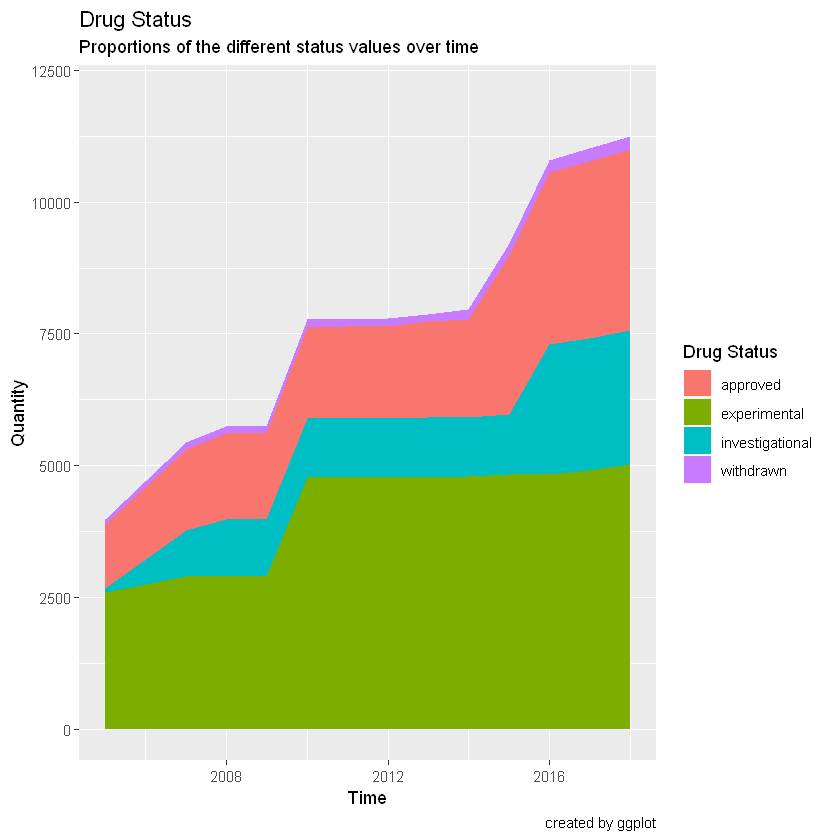

In [2]:
## get status Data
statusData <- 
    drugbank %>% 
    mutate(creationDate = year(creationDate)) %>% 
    group_by(creationDate, status) %>% 
    summarise(count = n()) %>% 
    spread(status, count) %>% 
    ungroup()    # avoids trouble later when plotting using plotly

# remove any NA values that resulted from the spread() operation
statusData[is.na(statusData)] <- 0

# cumulative sums for all status types
statusData[,2:ncol(statusData)] <- 
    statusData[,2:ncol(statusData)] %>% 
    mutate_all(cumsum)

## get plot of the quantities of the different drug statuses over time
p2 <- 
    statusData %>% 
    ggplot(aes(x = creationDate)) + 
    geom_area(aes(y = experimental+investigational+approved+withdrawn, fill = 'withdrawn')) +  
    geom_area(aes(y = experimental+investigational+approved, fill = 'approved')) +  
    geom_area(aes(y = experimental+investigational, fill = 'investigational')) +  
    geom_area(aes(y = experimental, fill = 'experimental')) +
    scale_y_continuous(limits = c(0,12000)) + 
    xlab('Time') + 
    ylab('Quantity') + 
    labs(title = 'Drug Status',
         subtitle = 'Proportions of the different status values over time', 
         caption = 'created by ggplot', 
         fill = 'Drug Status')

## display plot
p2

## 3. Drug *Degrees*

From the previous plot, we observed blah, blah, blah. This is interesting information because yada, yada, yada.

Now that we've had a look at some drug statistics, we'll now shift our attention to the drug *targets*. This task will involve us showing some target statistics and how these evolved over the lifetime of the DrugBank database. Let's go!

***Character Limit: 800, Paragraph Limit: 3***

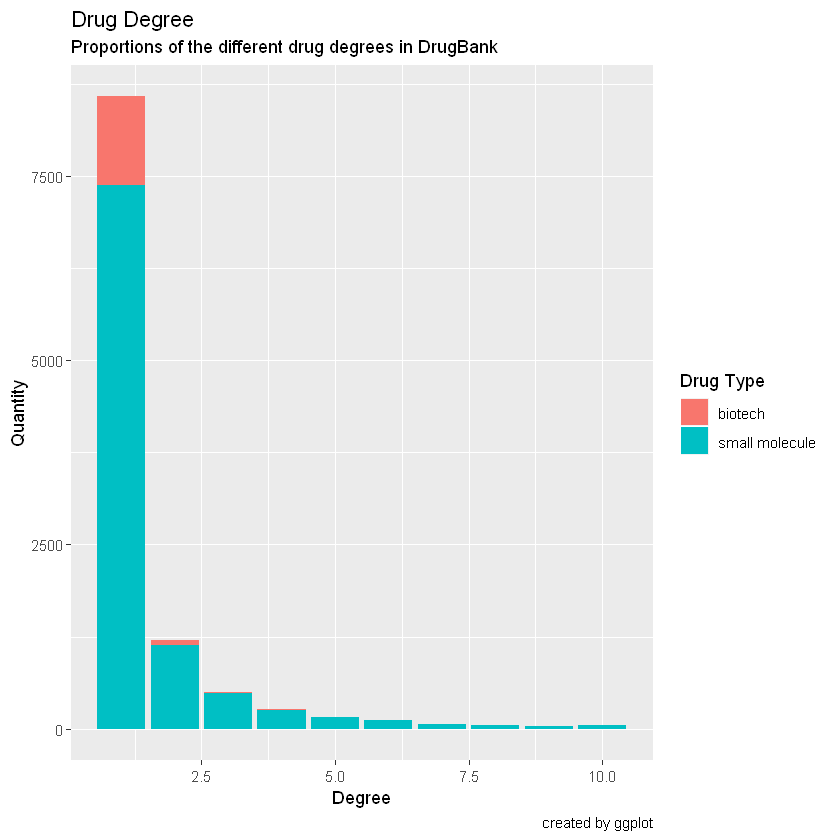

In [3]:
## get drug degree data
drugDegreeData <- 
    drugbank %>% 
    select(drug, type, status, targets) %>% 
    separate_rows(targets, sep = ';') %>% 
    group_by(drug, type, status) %>% 
    summarise(count = n()) %>% 
    filter(count <= 10)

## get plot of the drug degrees
p3 <- 
    drugDegreeData %>% 
    ggplot(aes(x = count, fill = type)) + 
    geom_bar() + 
    xlab('Degree') + 
    ylab('Quantity') + 
    labs(title = 'Drug Degree',
         subtitle = 'Proportions of the different drug degrees in DrugBank', 
         caption = 'created by ggplot', 
         fill = 'Drug Type')

## display plot
p3

## ((Alternative)) 3. Drug *Targets*

At this point, we have now observed *drugs* and *targets* over time. We now look at drug-target *interactions*.

***Character Limit: 800, Paragraph Limit: 3***

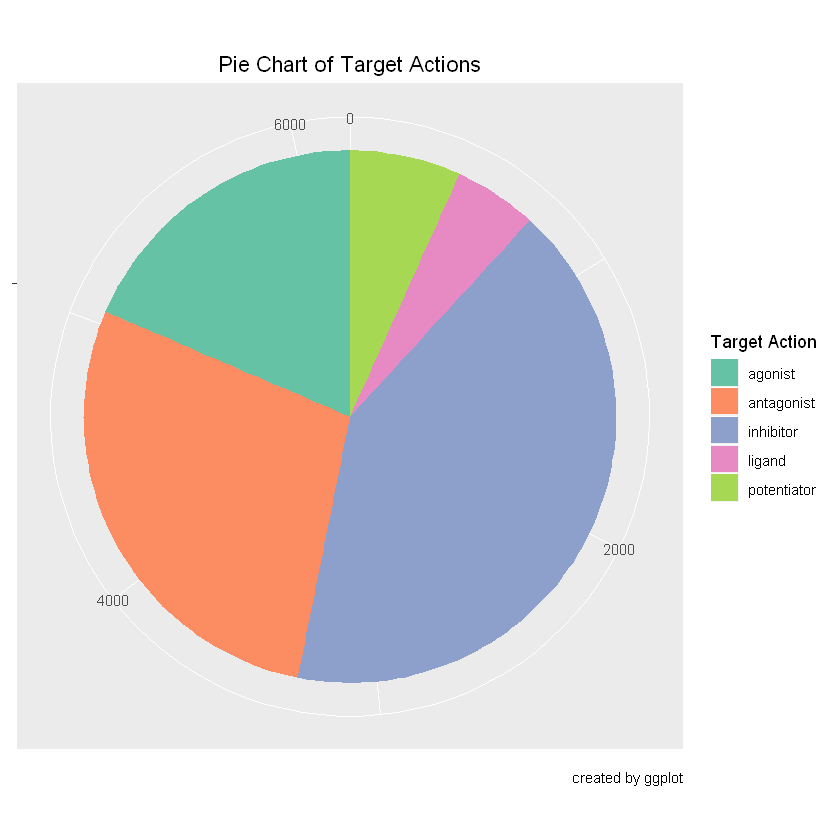

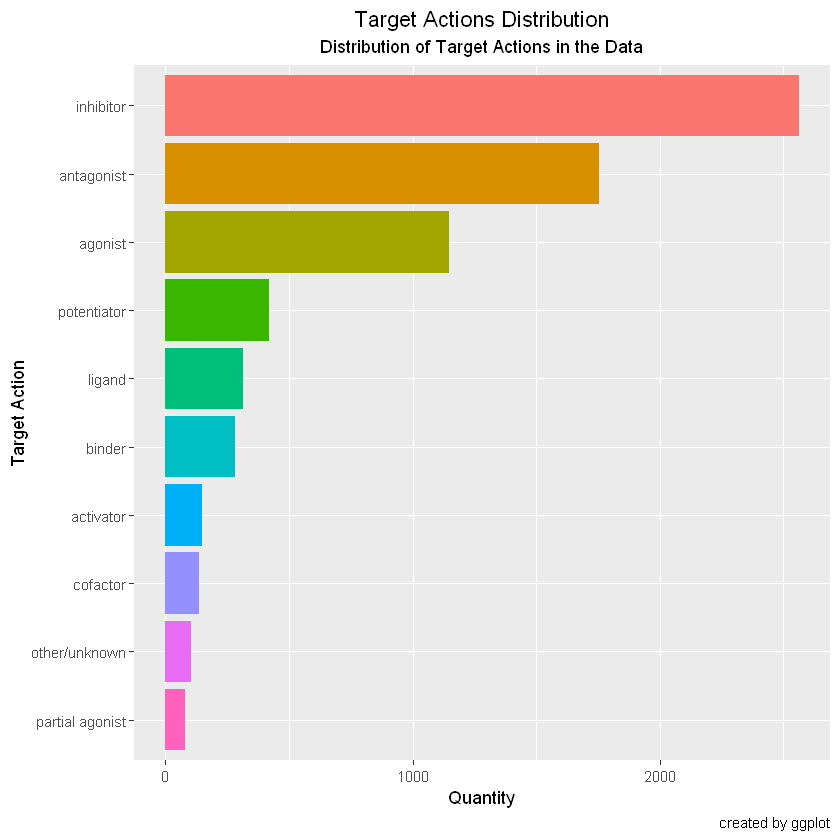

In [4]:
## get counts of the different target actions in the data
targetActionCounts <- 
    drugbank_target_actions %>% 
    group_by(text) %>% 
    summarise(count = n()) %>% 
    arrange(desc(count))

## get pie chart of the 5 most occurring target actions in the data
p3a <- 
    ggplot(targetActionCounts[1:5,], aes(x = "", y = count, fill = factor(text))) + 
    geom_bar(width = 1, stat = "identity") +
    theme(axis.line = element_blank(), plot.title = element_text(hjust=0.5)) + 
    labs(title="Pie Chart of Target Actions", 
         fill="Target Action", 
         x=NULL, 
         y=NULL, 
         caption="created by ggplot") + 
    coord_polar(theta = "y", start=0) + 
    scale_fill_brewer(palette = "Set2")  # Color palette

## display plot
p3a


##########  ##########
##      ##  ##      ##
##      ##  ##########
##      ##  ##   ##
##########  ##     ###


## get bar chart of the 10 most occurring target actions in the data
p3b <- 
    ggplot(targetActionCounts[1:10,], aes(x = reorder(text,count), y = count, fill = letters[1:10])) + 
    geom_bar(stat = "identity") +
    theme(axis.line = element_blank(), 
          plot.title = element_text(hjust=0.5), 
          plot.subtitle = element_text(hjust=0.5)) + 
    labs(fill="text", 
         x = 'Target Action', 
         y = 'Quantity', 
         title="Target Actions Distribution", 
         subtitle = 'Distribution of Target Actions in the Data',
         caption="created by ggplot") + 
    guides(fill=FALSE) +    ## removes legend for the bar colors
    coord_flip()            ## switches the X and Y axes

## display plot
p3b

*Stop here! Only the three first tasks. :)*

***Next tasks will involve diseases, manufacturers, a case study of a drug (2 tasks), a case study of a disease (2 tasks).***

***When you submit, tell them you may use extra data (that won't exceed their data size limits) in the full project (if it gets accepted, that is). Also mention that the project topic may change slightly: instead of "evolutionary analysis", it may be "exploratory analysis". If you think this will be a problem, maybe call the analysis "exploratory" in the first place?***